# Movie metadata csv to data.csv

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('movie_metadata.csv')

In [5]:
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [6]:
data.shape

(5043, 28)

In [7]:
data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [10]:
data.describe(include=['O'])

,color,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,movie_imdb_link,language,country,content_rating
count,5024,4939,5030,5043,5036,5043,5020,4890,5043,5031,5038,4740
unique,2,2398,3032,914,2097,4917,3521,4760,4919,47,65,18
top,Color,Steven Spielberg,Morgan Freeman,Drama,Robert De Niro,Home,Ben Mendelsohn,based on novel,http://www.imdb.com/title/tt0360717/?ref_=fn_t...,English,USA,R
freq,4815,26,20,236,49,3,8,4,3,4704,3807,2118


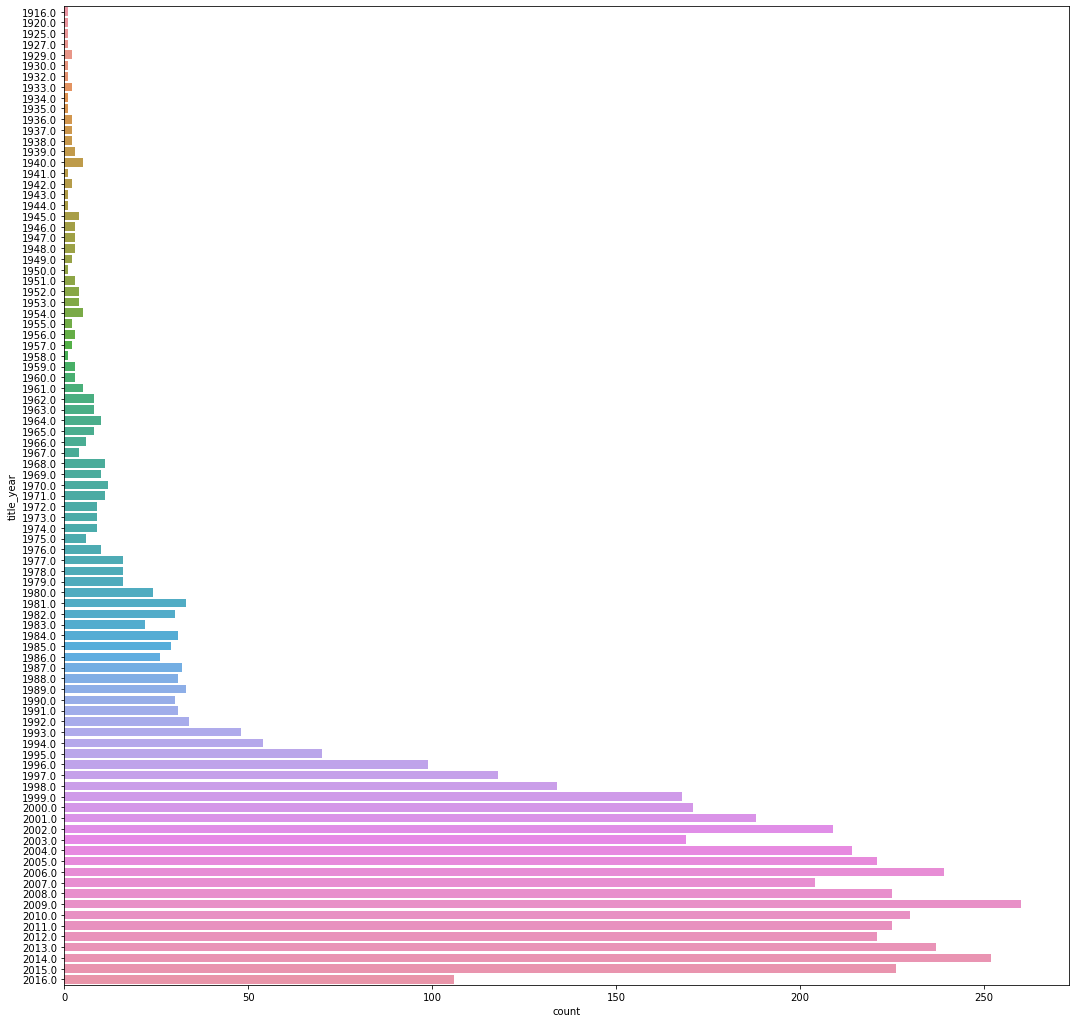

In [21]:
plt.subplots(figsize=(18,18))
value = data.title_year.sort_index(ascending = True)
sns.countplot(y=value)



In [22]:
data = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [23]:
data.head(10)

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...
5,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,Action|Adventure|Sci-Fi,John Carter
6,Sam Raimi,J.K. Simmons,James Franco,Kirsten Dunst,Action|Adventure|Romance,Spider-Man 3
7,Nathan Greno,Brad Garrett,Donna Murphy,M.C. Gainey,Adventure|Animation|Comedy|Family|Fantasy|Musi...,Tangled
8,Joss Whedon,Chris Hemsworth,Robert Downey Jr.,Scarlett Johansson,Action|Adventure|Sci-Fi,Avengers: Age of Ultron
9,David Yates,Alan Rickman,Daniel Radcliffe,Rupert Grint,Adventure|Family|Fantasy|Mystery,Harry Potter and the Half-Blood Prince


In [24]:
for col in ['director_name','actor_1_name','actor_2_name','actor_3_name']:
    data[col].replace(np.nan, 'unknown',inplace=True)

In [54]:
data.movie_title = data.movie_title.str.lower()

In [79]:
data = data.dropna()

In [83]:
data.movie_title =data.movie_title.apply(lambda x: x[:-1])

A:\Download\Programs\DwnlData\avijeet\Anaconda\lib\site-packages\pandas\core\generic.py:5165: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [84]:
data.to_csv('data.csv',index=False)

# credits and metadata csv to new_data.csv

In [85]:
credits = pd.read_csv('credits.csv')

In [86]:
meta = pd.read_csv('movies_metadata.csv')

A:\Download\Programs\DwnlData\avijeet\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [87]:
meta.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [88]:
meta.release_date = pd.to_datetime(meta.release_date, errors='coerce')


In [91]:
meta['year'] = meta['release_date'].dt.year

In [94]:
meta.year.value_counts().sort_index()

1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: year, Length: 135, dtype: int64

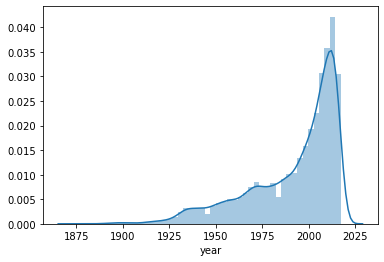

In [96]:
sns.distplot(meta.year.dropna())

In [100]:
# Getting only 2017 movies as we already have movies up to the year 2016 in data.csv file. 
# We don't have enough data for the movies from 2018, 2019 and 2020. 
# We'll deal with it in the upcoming preprocessing files

new_meta =  meta.loc[meta.year==2017,['genres','id','title','year']]

In [101]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [105]:
new_meta['id'].apply(lambda x: type(x)).nunique()

1